# Perceptron-AdaLine in python:
This is main workflow and functions you need. but if there is something missing or you need to add more or remove something feel free to try it.  
**JUST dont change _Pereceptron_ and _Adaline_  class methods**(their argumants only)

In [ ]:
import numpy as np
np.random.seed(36) #dont change this line
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder
from progressbar import ProgressBar
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
# download dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()


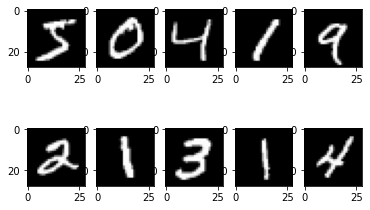

In [ ]:
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i,:,:], cmap = "gray")

In [ ]:
X_train = []
Y_train = []
for i in range(x_train.shape[0]):
  if y_train[i]==0 or y_train[i]==8 or y_train[i]==9:
    Y_train.append(y_train[i])
    X_train.append(x_train[i])

X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [ ]:
X_test= []
Y_test= []
for i in range(x_test.shape[0]):
  if y_test[i]==0 or y_test[i]==8 or y_test[i]==9:
    Y_test.append(y_test[i])
    X_test.append(x_test[i])

X_test= np.array(X_test)
Y_test= np.array(Y_test)

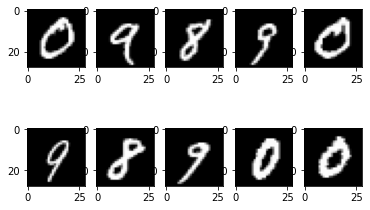

In [ ]:
pr = np.where(y_train==0)
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i,:,:], cmap = "gray")

In [ ]:
enc = OneHotEncoder(handle_unknown='ignore')
Y_train1 = Y_train.reshape(-1,1)
enc.fit(Y_train1)
Y_train1 = enc.transform(Y_train1).toarray()
Y_train1[np.where(Y_train1 == 0)] = -1

In [ ]:
enc = OneHotEncoder(handle_unknown='ignore')
Y_test1 = Y_test.reshape(-1,1)
enc.fit(Y_test1)
Y_test1 = enc.transform(Y_test1).toarray()
Y_test1[np.where(Y_test1 == 0)] = -1

In [ ]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2])

# Perceptron algorithm:

In [ ]:
class Pereceptron(object):
  """
  Perceptorn classifier for mnist dataset,
  """
  def __init__(self,num_classes=3):
    self.p = num_classes

  # function to create a list containing mini-batches
  def create_mini_batches(self,x, y, batch_size):
    mini_batches = []
    d = y.shape[1]
    data = np.hstack((x, y))
    np.random.shuffle(data)
    #print(x.shape, y.shape, data.shape)
    n_minibatches = data.shape[0] // batch_size
    i = 0
    for i in range(n_minibatches + 1):
      mini_batch = data[i * batch_size:(i + 1)*batch_size, :]
      #print(mini_batch.shape,'mini_batch')
      X_mini = mini_batch[:, :-d]
      Y_mini = mini_batch[:, -d:]
      mini_batches.append((X_mini, Y_mini))
    if data.shape[0] % batch_size != 0:
      mini_batch = data[i * batch_size:data.shape[0]]
      X_mini = mini_batch[:, :-d]
      Y_mini = mini_batch[:, -d:]
      mini_batches.append((X_mini, Y_mini))
    #print('Y_mini',Y_mini.shape)
    #print('X_mini',X_mini.shape)
    return mini_batches

  def fit(self, x_train,y_train,batch_size=128, n_itr=10, x_test = None, y_test = None, eta=0.01, verbose=True):
    """
    Fit on training data.
    params:
      x_train: normalized mnist train data with shape(N,28,28)
      y_train: mnist train labels with shape(N,)
      batch_size: batch size for training
      n_itr: number of iterations to perfom training
      eta: learning rate (between 0. and 1.)
      verbose: print error every epoch
    return:
      list of errors
    """

    self.m = x_train.shape[1] #number of features(inputs)
    #number of perceptorns => (number of classes)
    #self.W = np.zeros((m+1,p))
    self.W = np.random.rand(self.m+1,self.p)
    #print(self.W.shape)
    history = {'train_acc':[], 'train_mse':[], 'test_acc':[], 'test_mse':[]}

    for epoch in range(n_itr):
      print('epoch:',epoch)
      k=0
      mini_batches = self.create_mini_batches(x_train, y_train, batch_size)
      with ProgressBar(max_value=len(mini_batches)) as bar:
        for mini_batch in mini_batches:
          X_mini, y_mini = mini_batch
          theta0 = np.ones((X_mini.shape[0],1))
          x = np.hstack((X_mini, theta0)) #X n*m+1 , W m+1*p
          z = np.dot(x, self.W) # z n*p
          z = self.sign(z)
          z = z*y_mini # y_mini n*p
          for i in range(self.p):
            y_ = y_mini[np.where(z[:,i] < 0),i]
            x_ = x[np.where(z[:,i] < 0),:]
            a = y_.T*x_
            a = a[0]
            for j in range(y_.shape[1]):
              self.W[:,i] =  self.W[:,i]  + eta*a[j,:]
          k = k+1
          bar.update(k)
      if x_test is not None:
        mse_test, acc_test = self.calc_metrics(x_test ,y_test ,batch_size)
        history['test_acc'].append(acc_test)
        history['test_mse'].append(mse_test)
        if verbose:
          print('    test_acc', acc_test,'    test_MSE', mse_test)
      mse_train, acc_train = self.calc_metrics(x_train ,y_train ,batch_size)
      if verbose:
        print('    train_acc', acc_train,'    train_MSE', mse_train)
      history['train_acc'].append(acc_train)
      history['train_mse'].append(mse_train)
    return history
  def _initialize(self):
    pass

  def evaluate(self,X ,Y ,batch_size=128):
    """
    evaluate model
    params:
      X: normalized mnist test data with shape(N,28,28)
      Y: mnist test labels with shape(N,)
      batch_size: batch size for batch operation
    """
    TP_TN = 0
    n_batches = X.shape[0] // batch_size
    i = 0
    mse = 0
    for i in range(n_batches):
      x = X[i * batch_size:(i + 1)*batch_size, :]
      y = Y[i * batch_size:(i + 1)*batch_size]
      preds = self.predict(x)
      for j in range(y.shape[0]):
        if np.all(y[j,:] == preds[j,:]):
          TP_TN = TP_TN + 1
    i = i+1
    if X.shape[0] % batch_size != 0:
      x = X[i * batch_size:X.shape[0], :]
      y = Y[i * batch_size:Y.shape[0]]
      preds = self.predict(x)
      for j in range(y.shape[0]):
        if np.all(y[j,:] == preds[j,:]):
          TP_TN = TP_TN + 1

    accuracy = TP_TN/Y.shape[0]
    return accuracy
  def calc_metrics(self,X ,Y ,batch_size=128):
    TP_TN = 0
    n_batches = X.shape[0] // batch_size
    i = 0
    mse = 0
    for i in range(n_batches):
      x = X[i * batch_size:(i + 1)*batch_size, :]
      y = Y[i * batch_size:(i + 1)*batch_size]
      preds = self.predict(x)
      for j in range(y.shape[0]):
        if np.all(y[j,:] == preds[j,:]):
          TP_TN = TP_TN + 1
      mse = mse +  np.sum((y - preds)**2)
    i = i+1
    if X.shape[0] % batch_size != 0:
      x = X[i * batch_size:X.shape[0], :]
      y = Y[i * batch_size:Y.shape[0]]
      preds = self.predict(x)
      for j in range(y.shape[0]):
        if np.all(y[j,:] == preds[j,:]):
          TP_TN = TP_TN + 1
      mse = mse + np.sum((y - preds)**2)

    accuracy = TP_TN/Y.shape[0]
    mse = mse/Y.shape[0]
    return mse,accuracy

  def sign(self,Z):
    Z[np.where(Z>=0)]= 1
    Z[np.where(Z<0)]= -1
    return Z
  def predict(self, X, batch_size=128):
    theta0 = np.ones((X.shape[0],1))
    X = np.hstack((X, theta0)) #X n*m+1 , W m+1*p
    predictions = np.dot(X,self.W)

    predictions[np.where(predictions>=0)]= 1
    predictions[np.where(predictions<0)]= -1
    return predictions





In [ ]:
# train:
model = Pereceptron()
history = model.fit(X_train/255.0, Y_train1,batch_size=64, n_itr=50,
                    x_test = X_test, y_test = Y_test1,eta=0.01, verbose=True)

100% (278 of 278) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


epoch: 0
    test_acc 0.8552143098211272     test_MSE 0.6304421194735066
    train_acc 0.9345483270326694     train_MSE 0.3103312080347571
epoch: 1


100% (278 of 278) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


    test_acc 0.818764765440432     test_MSE 0.7640904488693891
    train_acc 0.9445917734017942     train_MSE 0.2633865598374993
epoch: 2


100% (278 of 278) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


    test_acc 0.7927775902801215     test_MSE 0.8761390482618967
    train_acc 0.9471308469220786     train_MSE 0.2516503977881848
epoch: 3


100% (278 of 278) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


    test_acc 0.7563280458994263     test_MSE 1.0313871076611543
    train_acc 0.9526039609546917     train_MSE 0.2256954240252779
epoch: 4


100% (278 of 278) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


    test_acc 0.6871414107323659     test_MSE 1.2932838339520756
    train_acc 0.9197652767590138     train_MSE 0.35975850589629293
epoch: 5


100% (278 of 278) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


    test_acc 0.6621667229159636     test_MSE 1.3931825852176847
    train_acc 0.951080516842521     train_MSE 0.23224059132201094
epoch: 6


100% (278 of 278) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


    test_acc 0.652716841039487     test_MSE 1.4606817414782316
    train_acc 0.9476950854821419     train_MSE 0.259098346781019
epoch: 7


100% (278 of 278) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


    test_acc 0.6598042524468444     test_MSE 1.4242321970975362
    train_acc 0.9562150877390961     train_MSE 0.21711899791231734
epoch: 8


100% (278 of 278) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


    test_acc 0.6452919338508268     test_MSE 1.4863314208572393
    train_acc 0.9495570727303504     train_MSE 0.242848276251199
epoch: 9


100% (278 of 278) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


    test_acc 0.6071549105636179     test_MSE 1.6334795815052312
    train_acc 0.9414884613214467     train_MSE 0.2827963663036732
epoch: 10


100% (278 of 278) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


    test_acc 0.7343908201147485     test_MSE 1.1069861626729667
    train_acc 0.9543531004908875     train_MSE 0.21892456130451954
epoch: 11


100% (278 of 278) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


    test_acc 0.6422544718191022     test_MSE 1.5268309146135672
    train_acc 0.9535067426507927     train_MSE 0.22501833775320204
epoch: 12


100% (278 of 278) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


    test_acc 0.8538643266959163     test_MSE 0.6263921700978737
    train_acc 0.9533374710827738     train_MSE 0.21869886588049428
epoch: 13


100% (278 of 278) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


    test_acc 0.8461019237259534     test_MSE 0.6601417482281472
    train_acc 0.9454945550978954     train_MSE 0.25345596118038705
epoch: 14


100% (278 of 278) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


    test_acc 0.7600404994937563     test_MSE 1.0084373945325684
    train_acc 0.9627602550358292     train_MSE 0.18078203464424758
epoch: 15


100% (278 of 278) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


    test_acc 0.8805264934188323     test_MSE 0.5264934188322646
    train_acc 0.9576256841392541     train_MSE 0.20448005416690176
epoch: 16


100% (278 of 278) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


    test_acc 0.6415794802564968     test_MSE 1.4849814377320283
    train_acc 0.9345483270326694     train_MSE 0.29024431529650735
epoch: 17


100% (278 of 278) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


    test_acc 0.7394532568342895     test_MSE 1.1447856901788727
    train_acc 0.9544095243468939     train_MSE 0.21553912994414037
epoch: 18


100% (278 of 278) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


    test_acc 0.7391157610529868     test_MSE 1.1083361457981775
    train_acc 0.9621395926197597     train_MSE 0.18123342549229815
epoch: 19


100% (278 of 278) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


    test_acc 0.6115423557205535     test_MSE 1.6321295983800201
    train_acc 0.9535631665067991     train_MSE 0.22140721096879762
epoch: 20


100% (278 of 278) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


    test_acc 0.7509281133985826     test_MSE 1.0637867026662167
    train_acc 0.9585848896913615     train_MSE 0.19296958754161259
epoch: 21


100% (278 of 278) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


    test_acc 0.7573405332433345     test_MSE 1.0205872426594667
    train_acc 0.9640015798679682     train_MSE 0.1755910398916662
epoch: 22


100% (278 of 278) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


    test_acc 0.8062774215322308     test_MSE 0.8221397232534593
    train_acc 0.9424476668735542     train_MSE 0.2746713310387632
epoch: 23


100% (278 of 278) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


    test_acc 0.8349645629429632     test_MSE 0.7208909888626392
    train_acc 0.9447046211138069     train_MSE 0.24533092591547706
epoch: 24


100% (278 of 278) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


    test_acc 0.6790415119811002     test_MSE 1.3931825852176847
    train_acc 0.9511369406985274     train_MSE 0.23856006319471873
epoch: 25


100% (278 of 278) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


    test_acc 0.7303408707391158     test_MSE 1.1218359770502868
    train_acc 0.9576821079952604     train_MSE 0.1970321051740676
epoch: 26


100% (278 of 278) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


    test_acc 0.8083023962200473     test_MSE 0.8423894701316234
    train_acc 0.9614625063476838     train_MSE 0.18439316142865203
epoch: 27


100% (278 of 278) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


    test_acc 0.7374282821464732     test_MSE 1.159635504556193
    train_acc 0.9497827681543757     train_MSE 0.23020933250578343
epoch: 28


100% (278 of 278) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


    test_acc 0.7988525143435707     test_MSE 0.8518393520080999
    train_acc 0.9624217118997912     train_MSE 0.18145912091632344
epoch: 29


100% (278 of 278) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


    test_acc 0.7823152210597367     test_MSE 0.994937563280459
    train_acc 0.947187270778085     train_MSE 0.2417197991310726
epoch: 30


100% (278 of 278) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


    test_acc 0.7232534593317583     test_MSE 1.160985487681404
    train_acc 0.959036280539412     train_MSE 0.19680640975004232
epoch: 31


100% (278 of 278) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


    test_acc 0.7337158285521431     test_MSE 1.1083361457981775
    train_acc 0.9517011792585905     train_MSE 0.2297579416577329
epoch: 32


100% (278 of 278) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


    test_acc 0.6918663516706041     test_MSE 1.2932838339520756
    train_acc 0.9633809174518987     train_MSE 0.17017434971505951
epoch: 33


100% (278 of 278) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


    test_acc 0.8076274046574418     test_MSE 0.8180897738778266
    train_acc 0.9610111154996333     train_MSE 0.19184111042148622
epoch: 34


100% (278 of 278) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


    test_acc 0.7316908538643268     test_MSE 1.138035774552818
    train_acc 0.961857473339728     train_MSE 0.1776222987078937
epoch: 35


100% (278 of 278) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


    test_acc 0.7958150523118461     test_MSE 0.8653391832602092
    train_acc 0.9484850194662303     train_MSE 0.2500705298200079
epoch: 36


100% (278 of 278) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


    test_acc 0.7958150523118461     test_MSE 0.8639892001349984
    train_acc 0.86294645376065     train_MSE 0.7055238955030186
epoch: 37


100% (278 of 278) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


    test_acc 0.7532905838677016     test_MSE 1.038137023287209


100% (278 of 278) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


    train_acc 0.9554815776110139     train_MSE 0.21395926197596343
epoch: 38
    test_acc 0.8700641241984475     test_MSE 0.5831927100911238


100% (278 of 278) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


    train_acc 0.962026744907747     train_MSE 0.1764938215877673
epoch: 39
    test_acc 0.7745528180897738     test_MSE 0.9409382382720216


100% (278 of 278) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


    train_acc 0.9557636968910456     train_MSE 0.21757038876036788
epoch: 40
    test_acc 0.7509281133985826     test_MSE 1.077286533918326


100% (278 of 278) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


    train_acc 0.9642836991479998     train_MSE 0.16927156801895843
epoch: 41
    test_acc 0.7728653391832602     test_MSE 0.9490381370232872


100% (278 of 278) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


    train_acc 0.9487107148902556     train_MSE 0.24713648930767929
epoch: 42
    test_acc 0.71852851839352     test_MSE 1.1704353695578806


100% (278 of 278) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


    train_acc 0.9584156181233425     train_MSE 0.20132031823054788
epoch: 43
    test_acc 0.8180897738778266     test_MSE 0.80863989200135


100% (278 of 278) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


    train_acc 0.958133498843311     train_MSE 0.20132031823054788
epoch: 44
    test_acc 0.679379007762403     test_MSE 1.367532905838677
    train_acc 0.9585848896913615     train_MSE 0.19861197314224455
epoch: 45


100% (278 of 278) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


    test_acc 0.6587917651029362     test_MSE 1.4363820452244347
    train_acc 0.95937482367545     train_MSE 0.190035547029284
epoch: 46


100% (278 of 278) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


    test_acc 0.8420519743503206     test_MSE 0.7289908876139048
    train_acc 0.9541838289228686     train_MSE 0.19974045026237092
epoch: 47


100% (278 of 278) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


    test_acc 0.6773540330745865     test_MSE 1.410732365845427
    train_acc 0.9594312475314563     train_MSE 0.19816058229419398
epoch: 48


100% (278 of 278) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


    test_acc 0.7951400607492406     test_MSE 0.8923388457644279
    train_acc 0.9589234328273994     train_MSE 0.19883766856626983
epoch: 49


100% (278 of 278) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


    test_acc 0.7526155923050962     test_MSE 1.0691866351670605
    train_acc 0.9535631665067991     train_MSE 0.21599052079219094


In [ ]:
test_acc = model.evaluate(X_test/255.0,Y_test1 ,batch_size = 128)
print('Acc',test_acc*100)

Acc 94.73506581167736


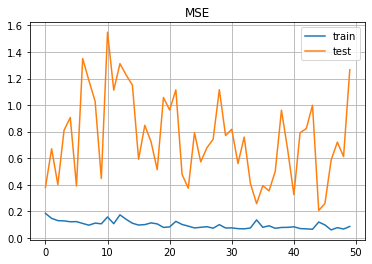

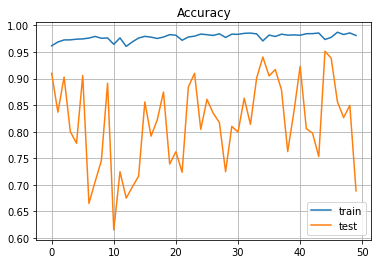

In [ ]:
# plot mse
plt.plot(history['train_mse'],'', history['test_mse'],'-')
plt.title('MSE')
plt.legend(['train','test'])
plt.grid()
plt.show()
# plot accuracy
plt.plot(history['train_acc'],'', history['test_acc'],'-')
plt.title('Accuracy')
plt.legend(['train','test'])
plt.grid()
plt.show()

prediction:  [-1.  1. -1.]  true label:  [-1.  1. -1.]


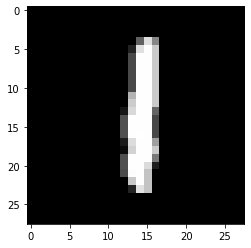

In [ ]:
# make a prediction
n = 100
pred = model.predict(X_test[n].reshape(1,X_test[n].shape[0]))
print('prediction: ', pred[0], " true label: ",Y_test1[n])
plt.imshow(X_test[n].reshape(28,28), cmap='gray')

# Adaline algorithm

In [ ]:
class Adaline(object):
  """
  Adaline classifier for mnist dataset,
  """
  def __init__(self,num_classes=3):
    self.p = num_classes

  # function to create a list containing mini-batches
  def create_mini_batches(self,x, y, batch_size):
    mini_batches = []
    d = y.shape[1]
    data = np.hstack((x, y))
    np.random.shuffle(data)
    #print(x.shape, y.shape, data.shape)
    n_minibatches = data.shape[0] // batch_size
    i = 0
    for i in range(n_minibatches + 1):
      mini_batch = data[i * batch_size:(i + 1)*batch_size, :]
      #print(mini_batch.shape,'mini_batch')
      X_mini = mini_batch[:, :-d]
      Y_mini = mini_batch[:, -d:]
      mini_batches.append((X_mini, Y_mini))
    if data.shape[0] % batch_size != 0:
      mini_batch = data[i * batch_size:data.shape[0]]
      X_mini = mini_batch[:, :-d]
      Y_mini = mini_batch[:, -d:]
      mini_batches.append((X_mini, Y_mini))
    #print('Y_mini',Y_mini.shape)
    #print('X_mini',X_mini.shape)
    return mini_batches

  def fit(self, x_train,y_train,batch_size=128, n_itr=10, x_test = None, y_test = None, eta=0.01, verbose=True):
    """
    Fit on training data.
    params:
      x_train: normalized mnist train data with shape(N,28,28)
      y_train: mnist train labels with shape(N,)
      batch_size: batch size for training
      n_itr: number of iterations to perfom training
      eta: learning rate (between 0. and 1.)
      verbose: print error every epoch
    return:
      list of errors
    """
    self.m = x_train.shape[1]#number of features(inputs)
    #number of perceptorns => (number of classes)
    #self.W = np.zeros((m+1,p))
    self.W = np.random.rand(self.m+1,self.p)
    #print(self.W.shape)
    train_history = {'train_acc':[], 'train_mse':[], 'test_acc':[], 'test_mse':[]}

    for epoch in range(n_itr):
      print('\nepoch:',epoch)
      k = 0
      mini_batches = self.create_mini_batches(x_train, y_train, batch_size)
      with ProgressBar(max_value=len(mini_batches)) as bar:
        for mini_batch in mini_batches:
          X_mini, y_mini = mini_batch
          theta0 = np.ones((X_mini.shape[0],1))
          x = np.hstack((X_mini, theta0)) #X n*m+1 , W m+1*p
          z = np.dot(x, self.W) # z n*p
          z = z*y_mini # y_mini n*p
          for i in range(self.p):
            y_ = y_mini[np.where(z[:,i] < 0),i]
            x_ = x[np.where(z[:,i] < 0),:]
            a = y_.T*x_
            a = a[0]
            for j in range(y_.shape[1]):
              self.W[:,i] =  self.W[:,i]  + eta*a[j,:]
          k = k+1
          bar.update(k)
      if x_test is not None:
        mse_test, acc_test = self.calc_metrics(x_test ,y_test ,batch_size)
        train_history['test_acc'].append(acc_test)
        train_history['test_mse'].append(mse_test)
        if verbose:
          print('    test_acc', acc_test,'    test_MSE', mse_test)
      mse_train, acc_train = self.calc_metrics(x_train ,y_train ,batch_size)
      if verbose:
        print('    train_acc', acc_train,'    train_MSE', mse_train)
      train_history['train_acc'].append(acc_train)
      train_history['train_mse'].append(mse_train)
    return train_history

  def _initialize(self):
    pass

  def evaluate(self,X ,Y ,batch_size=128):
    """
    evaluate model
    params:
      X: normalized mnist test data with shape(N,28,28)
      Y: mnist test labels with shape(N,)
      batch_size: batch size for batch operation
    """
    TP_TN = 0
    n_batches = X.shape[0] // batch_size
    i = 0
    mse = 0
    for i in range(n_batches):
      x = X[i * batch_size:(i + 1)*batch_size, :]
      y = Y[i * batch_size:(i + 1)*batch_size]
      preds = self.predict(x)
      for j in range(y.shape[0]):
        if np.all(y[j,:] == preds[j,:]):
          TP_TN = TP_TN + 1
    i = i+1
    if X.shape[0] % batch_size != 0:
      x = X[i * batch_size:X.shape[0], :]
      y = Y[i * batch_size:Y.shape[0]]
      preds = self.predict(x)
      for j in range(y.shape[0]):
        if np.all(y[j,:] == preds[j,:]):
          TP_TN = TP_TN + 1

    accuracy = TP_TN/Y.shape[0]
    return accuracy

  def calc_metrics(self,X ,Y ,batch_size=128):
    TP_TN = 0
    n_batches = X.shape[0] // batch_size
    i = 0
    mse = 0
    for i in range(n_batches):
      x = X[i * batch_size:(i + 1)*batch_size, :]
      y = Y[i * batch_size:(i + 1)*batch_size]
      preds = self.predict(x)
      for j in range(y.shape[0]):
        if np.all(y[j,:] == preds[j,:]):
          TP_TN = TP_TN + 1
      mse = mse +  np.sum((y - preds)**2)
    i = i+1
    if X.shape[0] % batch_size != 0:
      x = X[i * batch_size:X.shape[0], :]
      y = Y[i * batch_size:Y.shape[0]]
      preds = self.predict(x)
      for j in range(y.shape[0]):
        if np.all(y[j,:] == preds[j,:]):
          TP_TN = TP_TN + 1
      mse = mse + np.sum((y - preds)**2)

    accuracy = TP_TN/Y.shape[0]
    mse = mse/Y.shape[0]
    return mse,accuracy

  def predict(self, X, batch_size=128):
    theta0 = np.ones((X.shape[0],1))
    X = np.hstack((X, theta0)) #X n*m+1 , W m+1*p
    predictions = np.dot(X,self.W)

    predictions[np.where(predictions>=0)]= 1
    predictions[np.where(predictions<0)]= -1
    return predictions


In [ ]:
# train:
model = Adaline()
history = model.fit(X_train/255.0, Y_train1,batch_size=32, n_itr=50,
                    x_test = X_test, y_test = Y_test1,eta=0.01, verbose=False)
test_acc = model.evaluate(X_test, Y_test1)
print('test_acc',test_acc)

100% (589 of 589) |######################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch: 0


100% (589 of 589) |######################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch: 1


100% (589 of 589) |######################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch: 2


100% (589 of 589) |######################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch: 3


100% (589 of 589) |######################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch: 4


100% (589 of 589) |######################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch: 5


100% (589 of 589) |######################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch: 6


100% (589 of 589) |######################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch: 7


100% (589 of 589) |######################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch: 8


100% (589 of 589) |######################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch: 9


100% (589 of 589) |######################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch: 10


100% (589 of 589) |######################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch: 11


100% (589 of 589) |######################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch: 12


100% (589 of 589) |######################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch: 13


100% (589 of 589) |######################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch: 14


100% (589 of 589) |######################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch: 15


100% (589 of 589) |######################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch: 16


100% (589 of 589) |######################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch: 17


100% (589 of 589) |######################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch: 18


100% (589 of 589) |######################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch: 19


100% (589 of 589) |######################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch: 20


100% (589 of 589) |######################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch: 21


100% (589 of 589) |######################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch: 22


100% (589 of 589) |######################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch: 23


100% (589 of 589) |######################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch: 24


100% (589 of 589) |######################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch: 25


100% (589 of 589) |######################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch: 26


100% (589 of 589) |######################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch: 27


100% (589 of 589) |######################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch: 28


100% (589 of 589) |######################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch: 29


100% (589 of 589) |######################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch: 30


100% (589 of 589) |######################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch: 31


100% (589 of 589) |######################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch: 32


100% (589 of 589) |######################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch: 33


100% (589 of 589) |######################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch: 34


100% (589 of 589) |######################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch: 35


100% (589 of 589) |######################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch: 36


100% (589 of 589) |######################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch: 37


100% (589 of 589) |######################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch: 38


100% (589 of 589) |######################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch: 39


100% (589 of 589) |######################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch: 40


100% (589 of 589) |######################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch: 41


100% (589 of 589) |######################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch: 42


100% (589 of 589) |######################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch: 43


100% (589 of 589) |######################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch: 44


100% (589 of 589) |######################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch: 45


100% (589 of 589) |######################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch: 46


100% (589 of 589) |######################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch: 47


100% (589 of 589) |######################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch: 48


100% (589 of 589) |######################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch: 49
test_acc 0.76256


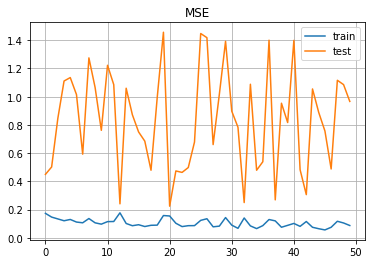

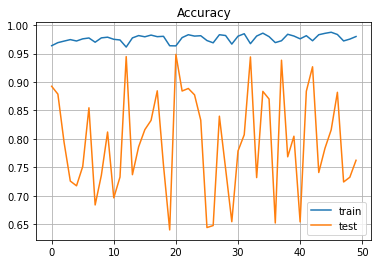

In [ ]:
# plot mse
plt.plot(history['train_mse'],'', history['test_mse'],'-')
plt.title('MSE')
plt.legend(['train','test'])
plt.grid()
plt.show()
# plot accuracy
plt.plot(history['train_acc'],'', history['test_acc'],'-')
plt.title('Accuracy')
plt.legend(['train','test'])
plt.grid()
plt.show()

prediction:  [-1.  1.  1.]  true label:  [-1.  1. -1.]


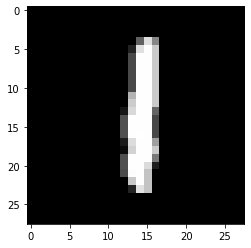

In [ ]:
# make a prediction
n = 100
pred = model.predict(X_test[n].reshape(1,X_test[n].shape[0]))
print('prediction: ', pred[0], " true label: ",Y_test1[n])
plt.imshow(X_test[n].reshape(28,28), cmap='gray')

# Part B

In [ ]:
x = X_train
xtest = X_test
pca = PCA(n_components=2)
X_train2 = pca.fit_transform(x)
X_test2 = pca.transform(xtest)
print(pca.components_.shape)

(2, 784)


In [ ]:
print(X_train2.shape, X_test2.shape)

(18796, 2) (3125, 2)


**1- Perceptrom**

In [ ]:
# train:
model = Pereceptron()
history = model.fit(X_train2/255.0, Y_train1,batch_size=64, n_itr=50,
          x_test = X_test2, y_test = Y_test1,eta=0.01, verbose=True)

100% (295 of 295) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


epoch: 0
    test_acc 0.75968     test_MSE 1.05728
    train_acc 0.8987018514577569     train_MSE 0.5194722281336455
epoch: 1


100% (295 of 295) |######################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (295 of 295) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


    test_acc 0.64768     test_MSE 1.50272
    train_acc 0.8871568418812513     train_MSE 0.5611832304745691
epoch: 2
    test_acc 0.75424     test_MSE 1.08416


100% (295 of 295) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


    train_acc 0.9047137688869973     train_MSE 0.4969142370717174
epoch: 3
    test_acc 0.6064     test_MSE 1.6832
    train_acc 0.866886571610981     train_MSE 0.6397105767184508
epoch: 4


100% (295 of 295) |######################| Elapsed Time: 0:00:00 Time:  0:00:00
N/A% (0 of 295) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--

    test_acc 0.5856     test_MSE 1.77024
    train_acc 0.8625239412640987     train_MSE 0.6573739093424132
epoch: 5


100% (295 of 295) |######################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (295 of 295) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


    test_acc 0.73632     test_MSE 1.14816
    train_acc 0.8738561396041711     train_MSE 0.5920408597573952
epoch: 6
    test_acc 0.68448     test_MSE 1.36704


100% (295 of 295) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


    train_acc 0.8916790806554586     train_MSE 0.5571398169823367
epoch: 7
    test_acc 0.73024     test_MSE 1.17504
    train_acc 0.8925303256011917     train_MSE 0.537135560757608
epoch: 8


100% (295 of 295) |######################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (295 of 295) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


    test_acc 0.64064     test_MSE 1.54368
    train_acc 0.8893381570546924     train_MSE 0.5496914237071717
epoch: 9
    test_acc 0.52448     test_MSE 2.0736


100% (295 of 295) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


    train_acc 0.5165992764417962     train_MSE 2.0419238135773567
epoch: 10
    test_acc 0.78496     test_MSE 0.9728
    train_acc 0.9038625239412641     train_MSE 0.5154288146414131
epoch: 11


100% (295 of 295) |######################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (295 of 295) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


    test_acc 0.78496     test_MSE 0.96512
    train_acc 0.9023728452862311     train_MSE 0.5120238348584806
epoch: 12
    test_acc 0.75552     test_MSE 1.07264


100% (295 of 295) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


    train_acc 0.8969461587571824     train_MSE 0.5441583315599063
epoch: 13
    test_acc 0.77728     test_MSE 0.9984
    train_acc 0.8861459885081933     train_MSE 0.6103426260906576
epoch: 14


100% (295 of 295) |######################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (295 of 295) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


    test_acc 0.74464     test_MSE 1.12512
    train_acc 0.9046605660778889     train_MSE 0.5120238348584806
epoch: 15
    test_acc 0.65632     test_MSE 1.4784


100% (295 of 295) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


    train_acc 0.8818897637795275     train_MSE 0.60012768674186
epoch: 16
    test_acc 0.7728     test_MSE 1.00224
    train_acc 0.8996062992125984     train_MSE 0.5107469674398808
epoch: 17


100% (295 of 295) |######################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (295 of 295) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


    test_acc 0.704     test_MSE 1.2992
    train_acc 0.8763566716322622     train_MSE 0.6220472440944882
epoch: 18
    test_acc 0.60384     test_MSE 1.69984
    train_acc 0.8404979782932539     train_MSE 0.8035752287720792
epoch: 19


100% (295 of 295) |######################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (295 of 295) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


    test_acc 0.792     test_MSE 0.92672
    train_acc 0.8758778463502873     train_MSE 0.6145988508193233
epoch: 20
    test_acc 0.67936     test_MSE 1.38752
    train_acc 0.8981698233666737     train_MSE 0.538625239412641
epoch: 21


100% (295 of 295) |######################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (295 of 295) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


    test_acc 0.73216     test_MSE 1.17376
    train_acc 0.8789104064694616     train_MSE 0.6233241115130879
epoch: 22
    test_acc 0.7872     test_MSE 0.96512


100% (295 of 295) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


    train_acc 0.8939668014471164     train_MSE 0.548414556288572
epoch: 23
    test_acc 0.74624     test_MSE 1.11744
    train_acc 0.8825814002979357     train_MSE 0.6267290912960204
epoch: 24


100% (295 of 295) |######################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (295 of 295) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


    test_acc 0.79392     test_MSE 0.93184
    train_acc 0.9017344115769312     train_MSE 0.510108533730581
epoch: 25
    test_acc 0.73632     test_MSE 1.1456
    train_acc 0.8890721430091508     train_MSE 0.5507554798893382
epoch: 26


100% (295 of 295) |######################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (295 of 295) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


    test_acc 0.67648     test_MSE 1.39776
    train_acc 0.8882208980634178     train_MSE 0.5952330283038945
epoch: 27
    test_acc 0.6912     test_MSE 1.32864


100% (295 of 295) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


    train_acc 0.8933815705469249     train_MSE 0.5235156416258778
epoch: 28
    test_acc 0.70816     test_MSE 1.26336
    train_acc 0.8900297935731006     train_MSE 0.5488401787614386
epoch: 29


100% (295 of 295) |######################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (295 of 295) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


    test_acc 0.56256     test_MSE 1.83936
    train_acc 0.8207065333049585     train_MSE 0.9031708874228559
epoch: 30
    test_acc 0.70976     test_MSE 1.25056
    train_acc 0.8858267716535433     train_MSE 0.5652266439668014
epoch: 31


100% (295 of 295) |######################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (295 of 295) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


    test_acc 0.7904     test_MSE 0.95104
    train_acc 0.905831027878272     train_MSE 0.5113854011491806
epoch: 32


100% (295 of 295) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


    test_acc 0.72256     test_MSE 1.216
    train_acc 0.898542243030432     train_MSE 0.5403277293041072
epoch: 33
    test_acc 0.7824     test_MSE 0.97536
    train_acc 0.8975313896573739     train_MSE 0.5479889338157055
epoch: 34


100% (295 of 295) |######################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (295 of 295) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


    test_acc 0.56672     test_MSE 1.84576
    train_acc 0.8838050649074272     train_MSE 0.570121302404767
epoch: 35
    test_acc 0.80064     test_MSE 0.91136


100% (295 of 295) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


    train_acc 0.9023196424771228     train_MSE 0.5239412640987444
epoch: 36
    test_acc 0.79904     test_MSE 0.9024
    train_acc 0.9040221323685891     train_MSE 0.5145775696956799
epoch: 37


100% (295 of 295) |######################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (295 of 295) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


    test_acc 0.78912     test_MSE 0.96384
    train_acc 0.903011278995531     train_MSE 0.5247925090444775
epoch: 38
    test_acc 0.76544     test_MSE 1.03296
    train_acc 0.870025537348372     train_MSE 0.6141732283464567
epoch: 39


100% (295 of 295) |######################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (295 of 295) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


    test_acc 0.70688     test_MSE 1.26848
    train_acc 0.8914662694190253     train_MSE 0.5441583315599063
epoch: 40
    test_acc 0.71904     test_MSE 1.21984


100% (295 of 295) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


    train_acc 0.8855607576080017     train_MSE 0.5590551181102362
epoch: 41
    test_acc 0.784     test_MSE 0.96384
    train_acc 0.8990742711215152     train_MSE 0.5224515854437114
epoch: 42


100% (295 of 295) |######################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (295 of 295) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


    test_acc 0.77376     test_MSE 1.00224
    train_acc 0.9018408171951479     train_MSE 0.5152160034049797
epoch: 43
    test_acc 0.71776     test_MSE 1.21984


100% (295 of 295) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


    train_acc 0.8867312194083847     train_MSE 0.5586294956373696
epoch: 44
    test_acc 0.68672     test_MSE 1.36064
    train_acc 0.8934347733560332     train_MSE 0.554373270908704
epoch: 45


100% (295 of 295) |######################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (295 of 295) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


    test_acc 0.76256     test_MSE 1.05856
    train_acc 0.8993934879761651     train_MSE 0.5152160034049797
epoch: 46
    test_acc 0.77792     test_MSE 0.98304


100% (295 of 295) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


    train_acc 0.8982762289848905     train_MSE 0.5352202596297084
epoch: 47
    test_acc 0.72224     test_MSE 1.21088
    train_acc 0.8982230261757821     train_MSE 0.5441583315599063
epoch: 48


100% (295 of 295) |######################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (295 of 295) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


    test_acc 0.7952     test_MSE 0.92416
    train_acc 0.8988082570759736     train_MSE 0.5639497765482018
epoch: 49
    test_acc 0.78304     test_MSE 1.00992
    train_acc 0.9005107469674399     train_MSE 0.548414556288572


In [ ]:
test_acc = model.evaluate(X_test2, Y_test1)
print('test_acc',test_acc)

test_acc 0.78304


In [ ]:
def boundary_line(w, max, min):
  x = np.linspace(min, max)
  y = 1/w[0]*(-w[1]*x - w[2])
  return x,y

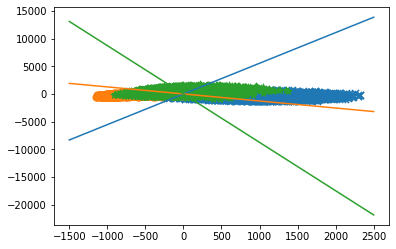

In [ ]:
W = model.W
markers = 'x','o','*'
colors = list(plt.rcParams['axes.prop_cycle'])
target = np.unique(Y_train)
for idx, (t, m) in enumerate(zip(target, markers)):
    subset = X_train2[Y_train == t]
    plt.scatter(subset[:, 0], subset[:, 1], s = 50,c = colors[idx]['color'], label = t, marker = m)
    xx, yy = boundary_line(W[idx], 2500, -1500)
    plt.plot(xx, yy, color = colors[idx]['color'])



**2- ADALINE**

In [ ]:
# train:
model = Adaline()
history = model.fit(X_train2/255.0, Y_train1,batch_size=32, n_itr=50,
          x_test = X_test2, y_test = Y_test1,eta=0.01, verbose=True)

100% (589 of 589) |######################| Elapsed Time: 0:00:00 Time:  0:00:00



epoch: 0
    test_acc 0.60928     test_MSE 1.67296


100% (589 of 589) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


    train_acc 0.8738561396041711     train_MSE 0.6388593317727176

epoch: 1
    test_acc 0.74752     test_MSE 1.1328


100% (589 of 589) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


    train_acc 0.8683230474569057     train_MSE 0.6897212172802724

epoch: 2
    test_acc 0.79936     test_MSE 0.9536


100% (589 of 589) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


    train_acc 0.8939135986380081     train_MSE 0.6071504575441583

epoch: 3
    test_acc 0.74144     test_MSE 1.1776


100% (589 of 589) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


    train_acc 0.8447542030219195     train_MSE 0.7667588848691211

epoch: 4
    test_acc 0.7584     test_MSE 1.06368


100% (589 of 589) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


    train_acc 0.8979038093211321     train_MSE 0.5179825494786124

epoch: 5
    test_acc 0.76544     test_MSE 1.05984


100% (589 of 589) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


    train_acc 0.8983294317939987     train_MSE 0.5286231113002766

epoch: 6
    test_acc 0.76128     test_MSE 1.0624


100% (589 of 589) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


    train_acc 0.8901361991913173     train_MSE 0.5679931900404341

epoch: 7
    test_acc 0.39904     test_MSE 2.81856


100% (589 of 589) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


    train_acc 0.5784741434347733     train_MSE 2.2313258140029792

epoch: 8
    test_acc 0.66048     test_MSE 1.44512


100% (589 of 589) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


    train_acc 0.7918706107682486     train_MSE 0.9582889976590764

epoch: 9
    test_acc 0.74912     test_MSE 1.11744


100% (589 of 589) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


    train_acc 0.8632155777825069     train_MSE 0.6535433070866141

epoch: 10
    test_acc 0.7344     test_MSE 1.15584


100% (589 of 589) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


    train_acc 0.8954564801021494     train_MSE 0.5284103000638434

epoch: 11
    test_acc 0.69088     test_MSE 1.33504


100% (589 of 589) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


    train_acc 0.8910938497552671     train_MSE 0.5475633113428389

epoch: 12
    test_acc 0.55712     test_MSE 1.88288


100% (589 of 589) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


    train_acc 0.8592253670993828     train_MSE 0.6882315386252394

epoch: 13
    test_acc 0.77888     test_MSE 0.98944


100% (589 of 589) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


    train_acc 0.9080655458608214     train_MSE 0.4977654820174505

epoch: 14
    test_acc 0.77472     test_MSE 1.00608


100% (589 of 589) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


    train_acc 0.8969461587571824     train_MSE 0.5275590551181102

epoch: 15
    test_acc 0.71264     test_MSE 1.25952


100% (589 of 589) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


    train_acc 0.8935943817833581     train_MSE 0.5743775271334326

epoch: 16
    test_acc 0.76992     test_MSE 1.04192


100% (589 of 589) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


    train_acc 0.8613534794637157     train_MSE 0.6533304958501809

epoch: 17
    test_acc 0.73888     test_MSE 1.14176


100% (589 of 589) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


    train_acc 0.8760906575867206     train_MSE 0.5967227069589275

epoch: 18
    test_acc 0.66848     test_MSE 1.4784


100% (589 of 589) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


    train_acc 0.7487763353905086     train_MSE 1.087678229410513

epoch: 19
    test_acc 0.52096     test_MSE 2.02112


100% (589 of 589) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


    train_acc 0.8806128963609279     train_MSE 0.5896999361566291

epoch: 20
    test_acc 0.73216     test_MSE 1.1648


100% (589 of 589) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


    train_acc 0.8976909980846989     train_MSE 0.5203234730793785

epoch: 21
    test_acc 0.79168     test_MSE 0.94336


100% (589 of 589) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


    train_acc 0.9065226643966802     train_MSE 0.5077676101298149

epoch: 22
    test_acc 0.6752     test_MSE 1.41056


100% (589 of 589) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


    train_acc 0.8906150244732922     train_MSE 0.582889976590764

epoch: 23
    test_acc 0.71584     test_MSE 1.24032


100% (589 of 589) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


    train_acc 0.9004575441583316     train_MSE 0.5301127899553096

epoch: 24
    test_acc 0.80192     test_MSE 0.89984


100% (589 of 589) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


    train_acc 0.8983826346031071     train_MSE 0.5260693764630773

epoch: 25
    test_acc 0.7744     test_MSE 1.00096


100% (589 of 589) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


    train_acc 0.9058842306873803     train_MSE 0.5111725899127474

epoch: 26
    test_acc 0.53344     test_MSE 1.97248


100% (589 of 589) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


    train_acc 0.8718876356671632     train_MSE 0.6048095339433922

epoch: 27
    test_acc 0.67872     test_MSE 1.3888


100% (589 of 589) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


    train_acc 0.8834858480527772     train_MSE 0.5694828686954672

epoch: 28
    test_acc 0.5904     test_MSE 1.74848


100% (589 of 589) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


    train_acc 0.8863587997446265     train_MSE 0.5777825069163652

epoch: 29
    test_acc 0.7584     test_MSE 1.07776


100% (589 of 589) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


    train_acc 0.8809321132155777     train_MSE 0.6554586082145137

epoch: 30
    test_acc 0.7424     test_MSE 1.13152


100% (589 of 589) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


    train_acc 0.9017876143860396     train_MSE 0.5237284528623112

epoch: 31
    test_acc 0.63232     test_MSE 1.59232


100% (589 of 589) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


    train_acc 0.8918918918918919     train_MSE 0.5682060012768674

epoch: 32
    test_acc 0.54112     test_MSE 1.96608


100% (589 of 589) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


    train_acc 0.7149393487976166     train_MSE 1.3564588210257502

epoch: 33
    test_acc 0.7904     test_MSE 0.97024


100% (589 of 589) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


    train_acc 0.8989146626941903     train_MSE 0.5535220259629708

epoch: 34
    test_acc 0.78144     test_MSE 1.00352


100% (589 of 589) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


    train_acc 0.9000851244945733     train_MSE 0.5505426686529049

epoch: 35
    test_acc 0.78976     test_MSE 0.9472


100% (589 of 589) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


    train_acc 0.9097148329431795     train_MSE 0.5018088955096829

epoch: 36
    test_acc 0.6848     test_MSE 1.37856


100% (589 of 589) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


    train_acc 0.8974249840391573     train_MSE 0.5301127899553096

epoch: 37
    test_acc 0.73824     test_MSE 1.14944


100% (589 of 589) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


    train_acc 0.8994466907852735     train_MSE 0.5275590551181102

epoch: 38
    test_acc 0.4864     test_MSE 2.21056


100% (589 of 589) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


    train_acc 0.5352202596297084     train_MSE 1.9382847414343478

epoch: 39
    test_acc 0.79712     test_MSE 0.9088


100% (589 of 589) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


    train_acc 0.9018940200042562     train_MSE 0.5316024686103427

epoch: 40
    test_acc 0.66688     test_MSE 1.4464


100% (589 of 589) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


    train_acc 0.8895509682911258     train_MSE 0.5633113428389019

epoch: 41
    test_acc 0.76064     test_MSE 1.05472


100% (589 of 589) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


    train_acc 0.8983294317939987     train_MSE 0.5277718663545435

epoch: 42
    test_acc 0.76864     test_MSE 1.0816


100% (589 of 589) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


    train_acc 0.8788572036603532     train_MSE 0.5809746754628644

epoch: 43
    test_acc 0.80128     test_MSE 0.89344


100% (589 of 589) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


    train_acc 0.8990210683124069     train_MSE 0.5156416258778463

epoch: 44
    test_acc 0.728     test_MSE 1.216


100% (589 of 589) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


    train_acc 0.8424664822302618     train_MSE 0.7542030219195573

epoch: 45
    test_acc 0.7648     test_MSE 1.0368


100% (589 of 589) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


    train_acc 0.8976377952755905     train_MSE 0.5216003404979783

epoch: 46
    test_acc 0.73088     test_MSE 1.19936


100% (589 of 589) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


    train_acc 0.8475739519046606     train_MSE 0.7214300915088316

epoch: 47
    test_acc 0.75104     test_MSE 1.0944


100% (589 of 589) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


    train_acc 0.8602894232815492     train_MSE 0.6646094913811449

epoch: 48
    test_acc 0.77472     test_MSE 1.00352


100% (589 of 589) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


    train_acc 0.8949776548201746     train_MSE 0.5413917854862736

epoch: 49
    test_acc 0.60928     test_MSE 1.66912
    train_acc 0.8562460097893169     train_MSE 0.7450521387529262


In [ ]:
test_acc = model.evaluate(X_test2, Y_test1)
print('test_acc',test_acc)

test_acc 0.7888


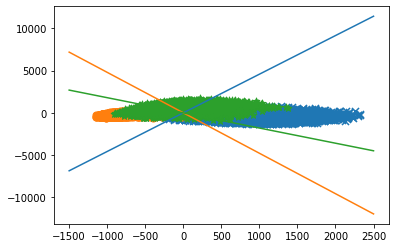

In [ ]:
W = model.W
markers = 'x','o','*'
colors = list(plt.rcParams['axes.prop_cycle'])
target = np.unique(Y_train)
for idx, (t, m) in enumerate(zip(target, markers)):
    subset = X_train2[Y_train == t]
    plt.scatter(subset[:, 0], subset[:, 1], s = 50,c = colors[idx]['color'], label = t, marker = m)
    xx, yy = boundary_line(W[idx], 2500, -1500)
    plt.plot(xx, yy, color = colors[idx]['color'])